<a href="https://www.kaggle.com/code/lalit7881/human-decision-fatigue-prediction-accuracy-100?scriptVersionId=294566449" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-decision-fatigue-behavioral-dataset/human_decision_fatigue_dataset.csv


## Title:
Human Decision Fatigue Prediction – Model Accuracy Overview

## Description:
This project analyzes behavioral, cognitive, and lifestyle features to predict human decision fatigue. Multiple machine learning algorithms—including Random Forest, Decision Tree, Gradient Boosting, Logistic Regression, Support Vector Machine, K-Nearest Neighbors, and Naive Bayes—were applied to classify fatigue levels based on factors such as hours awake, decisions made, task switching, sleep, stress, error rate, and cognitive load.

The models were evaluated on accuracy, precision, recall, F1-score, and confusion matrices. Random Forest achieved the highest accuracy of 99.98%, demonstrating the strong predictive power of these measurable indicators. The results provide a reliable baseline for understanding and mitigating decision fatigue in workplace environments and can guide further research in human performance and cognitive workload analysis.

## 

In [2]:
df = pd.read_csv("/kaggle/input/human-decision-fatigue-behavioral-dataset/human_decision_fatigue_dataset.csv")

In [3]:
df.head()

,Hours_Awake,Decisions_Made,Task_Switches,Avg_Decision_Time_sec,Sleep_Hours_Last_Night,Time_of_Day,Caffeine_Intake_Cups,Stress_Level_1_10,Error_Rate,Cognitive_Load_Score,Decision_Fatigue_Score,Fatigue_Level,System_Recommendation
0,7,28,7,2.30,5.8,Evening,0,2.4,0.000,2.6,15.6,Low,Continue
1,15,77,22,3.65,4.5,Afternoon,3,1.9,0.143,4.5,97.3,High,Take Break
2,11,57,23,3.67,6.8,Night,2,2.1,0.000,4.1,55.4,Moderate,Slow Down
3,8,39,10,2.39,5.3,Afternoon,1,1.0,0.000,2.3,29.7,Low,Continue
4,7,46,16,3.05,8.2,Night,1,2.8,0.000,3.9,19.1,Low,Continue


In [4]:
df.tail()

,Hours_Awake,Decisions_Made,Task_Switches,Avg_Decision_Time_sec,Sleep_Hours_Last_Night,Time_of_Day,Caffeine_Intake_Cups,Stress_Level_1_10,Error_Rate,Cognitive_Load_Score,Decision_Fatigue_Score,Fatigue_Level,System_Recommendation
24995,11,47,15,1.90,5.3,Afternoon,1,3.4,0.0,4.2,51.9,Moderate,Slow Down
24996,2,13,4,2.44,6.6,Afternoon,1,1.5,0.0,1.5,0.0,Low,Continue
24997,1,2,1,2.12,7.2,Night,1,1.0,0.0,0.7,0.0,Low,Continue
24998,5,28,11,3.49,5.9,Afternoon,1,1.0,0.0,2.0,9.8,Low,Continue
24999,8,44,12,3.25,6.3,Afternoon,3,3.4,0.0,4.0,24.4,Low,Continue


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hours_Awake             25000 non-null  int64  
 1   Decisions_Made          25000 non-null  int64  
 2   Task_Switches           25000 non-null  int64  
 3   Avg_Decision_Time_sec   25000 non-null  float64
 4   Sleep_Hours_Last_Night  25000 non-null  float64
 5   Time_of_Day             25000 non-null  object 
 6   Caffeine_Intake_Cups    25000 non-null  int64  
 7   Stress_Level_1_10       25000 non-null  float64
 8   Error_Rate              25000 non-null  float64
 9   Cognitive_Load_Score    25000 non-null  float64
 10  Decision_Fatigue_Score  25000 non-null  float64
 11  Fatigue_Level           25000 non-null  object 
 12  System_Recommendation   25000 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 2.5+ MB


In [6]:
df.describe()

,Hours_Awake,Decisions_Made,Task_Switches,Avg_Decision_Time_sec,Sleep_Hours_Last_Night,Caffeine_Intake_Cups,Stress_Level_1_10,Error_Rate,Cognitive_Load_Score,Decision_Fatigue_Score
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,9.088280,45.433080,13.623480,2.918346,6.085956,1.897240,2.202736,0.031877,3.365784,40.579280
std,4.928093,25.611583,8.521595,0.942644,1.114586,1.430483,1.329868,0.057457,1.729092,36.704221
min,1.000000,0.000000,0.000000,0.500000,2.000000,0.000000,1.000000,0.000000,0.600000,0.000000
25%,5.000000,23.000000,7.000000,2.270000,5.300000,1.000000,1.000000,0.000000,1.900000,0.000000
50%,9.000000,45.000000,13.000000,2.910000,6.100000,2.000000,1.800000,0.000000,3.200000,34.650000
75%,13.000000,67.000000,20.000000,3.550000,6.900000,3.000000,3.100000,0.045000,4.600000,74.200000
max,17.000000,117.000000,48.000000,6.800000,9.000000,6.000000,8.700000,0.359000,9.700000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hours_Awake             25000 non-null  int64  
 1   Decisions_Made          25000 non-null  int64  
 2   Task_Switches           25000 non-null  int64  
 3   Avg_Decision_Time_sec   25000 non-null  float64
 4   Sleep_Hours_Last_Night  25000 non-null  float64
 5   Time_of_Day             25000 non-null  object 
 6   Caffeine_Intake_Cups    25000 non-null  int64  
 7   Stress_Level_1_10       25000 non-null  float64
 8   Error_Rate              25000 non-null  float64
 9   Cognitive_Load_Score    25000 non-null  float64
 10  Decision_Fatigue_Score  25000 non-null  float64
 11  Fatigue_Level           25000 non-null  object 
 12  System_Recommendation   25000 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 2.5+ MB


In [8]:
df.isnull().sum()

Hours_Awake               0
Decisions_Made            0
Task_Switches             0
Avg_Decision_Time_sec     0
Sleep_Hours_Last_Night    0
Time_of_Day               0
Caffeine_Intake_Cups      0
Stress_Level_1_10         0
Error_Rate                0
Cognitive_Load_Score      0
Decision_Fatigue_Score    0
Fatigue_Level             0
System_Recommendation     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.columns

Index(['Hours_Awake', 'Decisions_Made', 'Task_Switches',
       'Avg_Decision_Time_sec', 'Sleep_Hours_Last_Night', 'Time_of_Day',
       'Caffeine_Intake_Cups', 'Stress_Level_1_10', 'Error_Rate',
       'Cognitive_Load_Score', 'Decision_Fatigue_Score', 'Fatigue_Level',
       'System_Recommendation'],
      dtype='object')

## Data visualizations

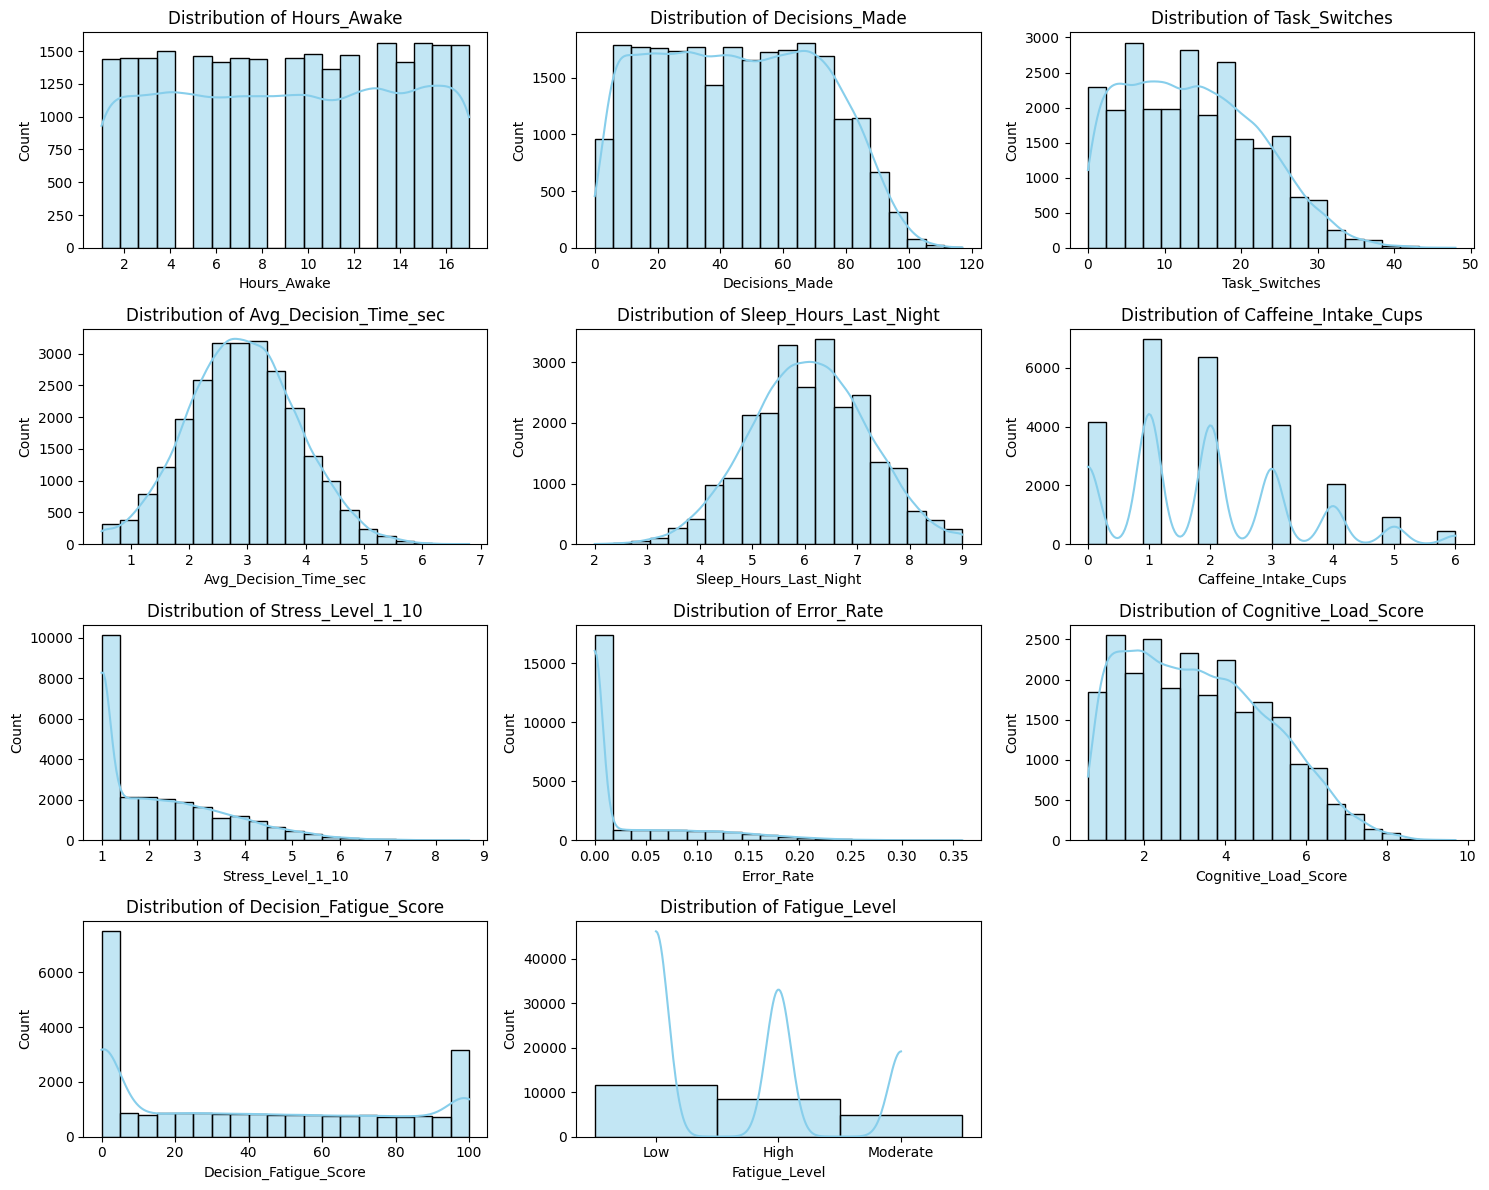

In [11]:
continuous_cols = ['Hours_Awake','Decisions_Made','Task_Switches','Avg_Decision_Time_sec',
                   'Sleep_Hours_Last_Night','Caffeine_Intake_Cups','Stress_Level_1_10',
                   'Error_Rate','Cognitive_Load_Score','Decision_Fatigue_Score','Fatigue_Level']

plt.figure(figsize=(15,12))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4,3,i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

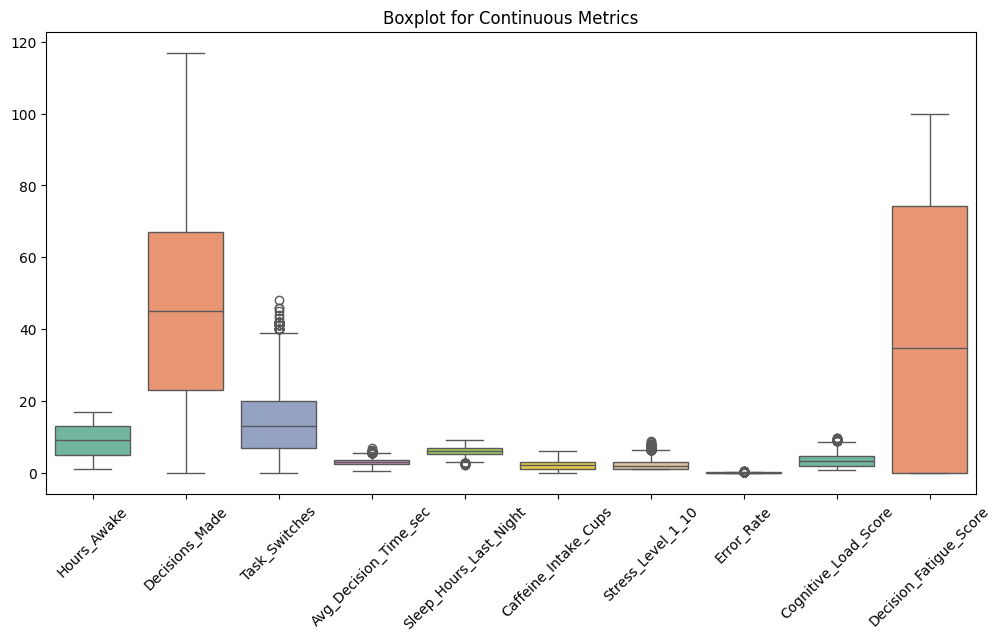

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[continuous_cols], palette='Set2')
plt.xticks(rotation=45)
plt.title('Boxplot for Continuous Metrics')
plt.show()


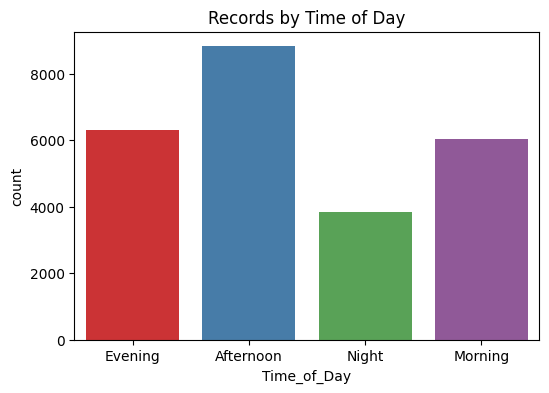

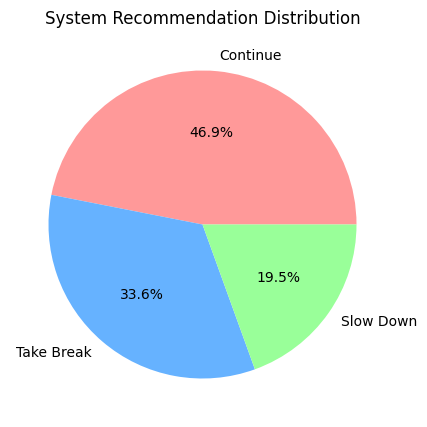

In [13]:
# Count of Time_of_Day
plt.figure(figsize=(6,4))
sns.countplot(x='Time_of_Day', data=df, palette='Set1')
plt.title('Records by Time of Day')
plt.show()

# Pie chart for System Recommendation
df['System_Recommendation'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5), colors=['#FF9999','#66B2FF','#99FF99'])
plt.title('System Recommendation Distribution')
plt.ylabel('')
plt.show()


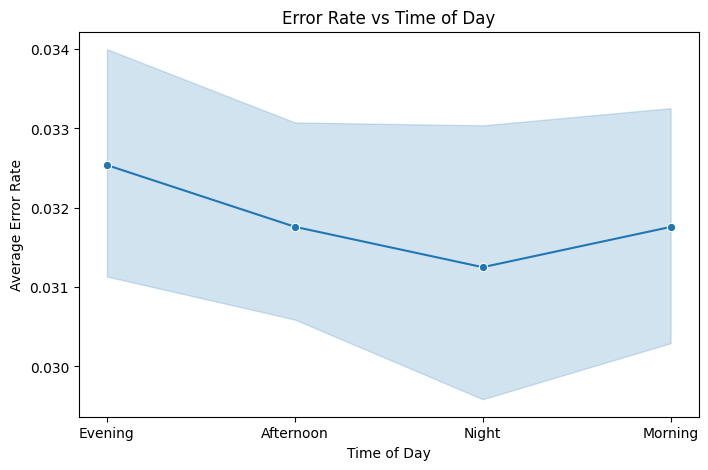

In [14]:
# Average Error Rate by Time of Day
plt.figure(figsize=(8,5))
sns.lineplot(x='Time_of_Day', y='Error_Rate', data=df, marker='o')
plt.title('Error Rate vs Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Error Rate')
plt.show()


In [15]:
import plotly.express as px

fig = px.scatter_3d(df, x='Hours_Awake', y='Cognitive_Load_Score', z='Decision_Fatigue_Score',
                    color='System_Recommendation', size='Decisions_Made',
                    hover_data=['Task_Switches','Error_Rate'])
fig.update_layout(title='3D Scatter: Cognitive Metrics vs Decisions')
fig.show()



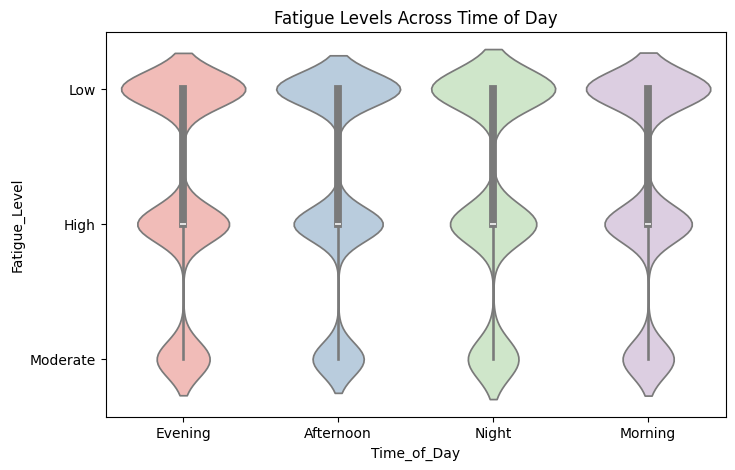

In [16]:
# Violin plot example
plt.figure(figsize=(8,5))
sns.violinplot(x='Time_of_Day', y='Fatigue_Level', data=df, palette='Pastel1')
plt.title('Fatigue Levels Across Time of Day')
plt.show()


## ML

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [18]:
# Encode categorical columns
le_fatigue = LabelEncoder()
le_time = LabelEncoder()
df["Fatigue_Level"] = le_fatigue.fit_transform(df["Fatigue_Level"])
df["Time_of_Day"] = le_time.fit_transform(df["Time_of_Day"])

# Define features and target
X = df.drop(columns=["Fatigue_Level", "System_Recommendation"])
y = df["Fatigue_Level"]

In [19]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, max_depth=5, random_state=42)
}

# Train, predict, and evaluate all models
results = []

Model: Logistic Regression
Accuracy: 99.68%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1681
           1       1.00      1.00      1.00      2346
           2       0.99      0.99      0.99       973

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



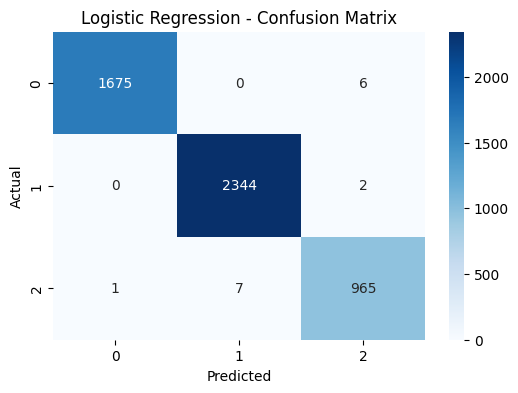

Model: Support Vector Machine
Accuracy: 99.38%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1681
           1       0.99      1.00      1.00      2346
           2       0.99      0.98      0.98       973

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



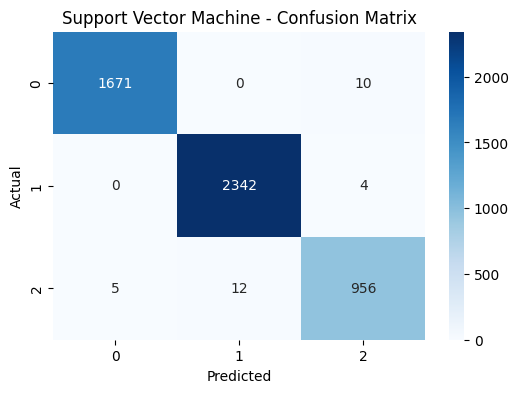

Model: K-Nearest Neighbors
Accuracy: 96.08%
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1681
           1       0.98      0.98      0.98      2346
           2       0.89      0.91      0.90       973

    accuracy                           0.96      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.96      0.96      0.96      5000



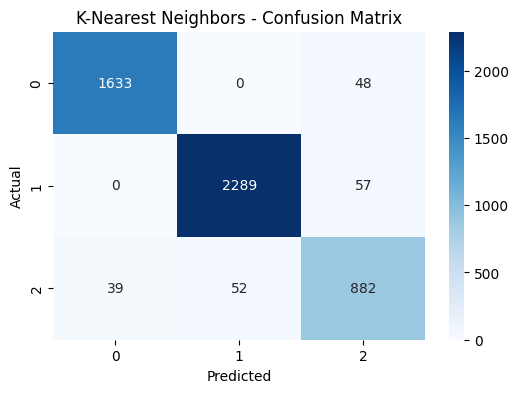

Model: Decision Tree
Accuracy: 99.94%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1681
           1       1.00      1.00      1.00      2346
           2       1.00      1.00      1.00       973

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



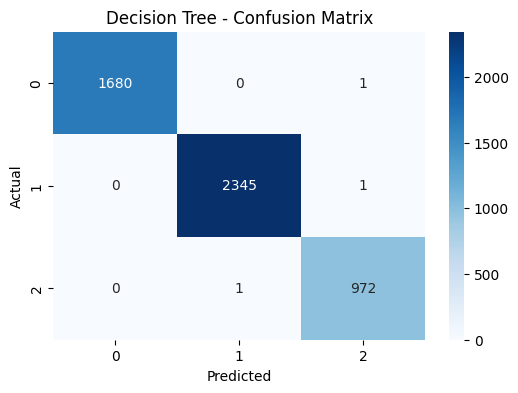

Model: Random Forest
Accuracy: 99.98%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1681
           1       1.00      1.00      1.00      2346
           2       1.00      1.00      1.00       973

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



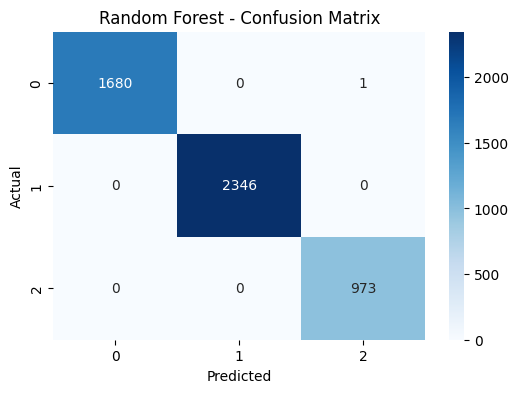

Model: Naive Bayes
Accuracy: 94.54%
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1681
           1       0.94      0.99      0.97      2346
           2       0.88      0.83      0.86       973

    accuracy                           0.95      5000
   macro avg       0.94      0.92      0.93      5000
weighted avg       0.95      0.95      0.94      5000



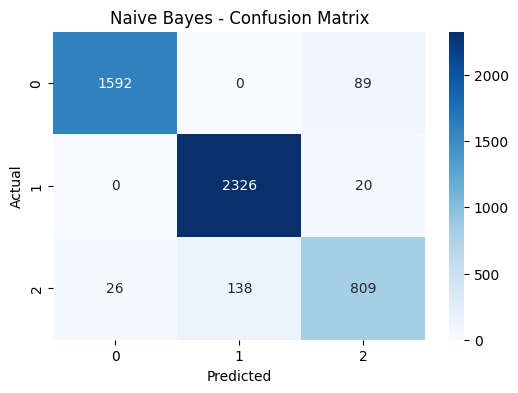

Model: Gradient Boosting
Accuracy: 99.94%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1681
           1       1.00      1.00      1.00      2346
           2       1.00      1.00      1.00       973

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



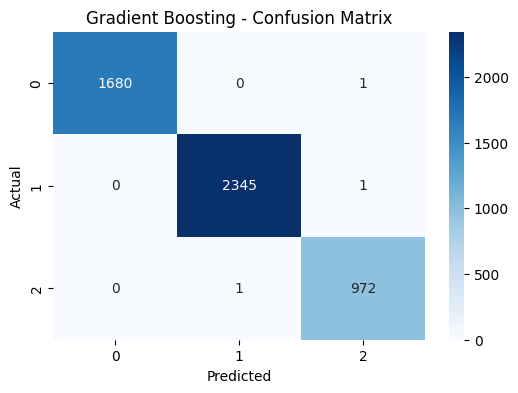

Summary of Model Accuracies:
                    Model  Accuracy (%)
4           Random Forest         99.98
3           Decision Tree         99.94
6       Gradient Boosting         99.94
0     Logistic Regression         99.68
1  Support Vector Machine         99.38
2     K-Nearest Neighbors         96.08
5             Naive Bayes         94.54


In [20]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred) * 100  # accuracy in percentage
    results.append({"Model": name, "Accuracy (%)": acc})
    
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.2f}%")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Summary table of all models
results_df = pd.DataFrame(results).sort_values(by="Accuracy (%)", ascending=False)
print("Summary of Model Accuracies:")
print(results_df)

## Thank you..pls upvote!!!!